In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
big_mart=pd.read_csv('train_v9rqX0R.csv')
big_mart.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


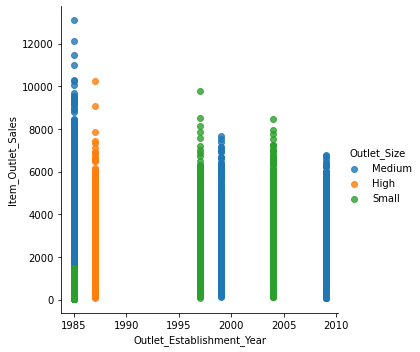

In [5]:
sns.lmplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=big_mart,hue='Outlet_Size',fit_reg=False)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

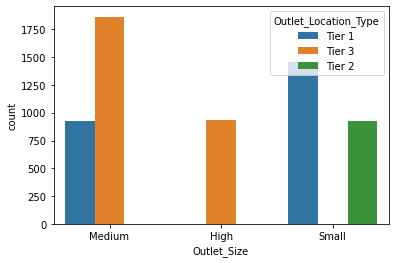

In [6]:
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=big_mart)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

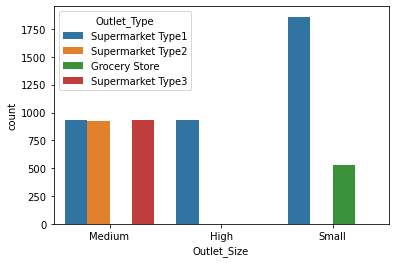

In [7]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=big_mart)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

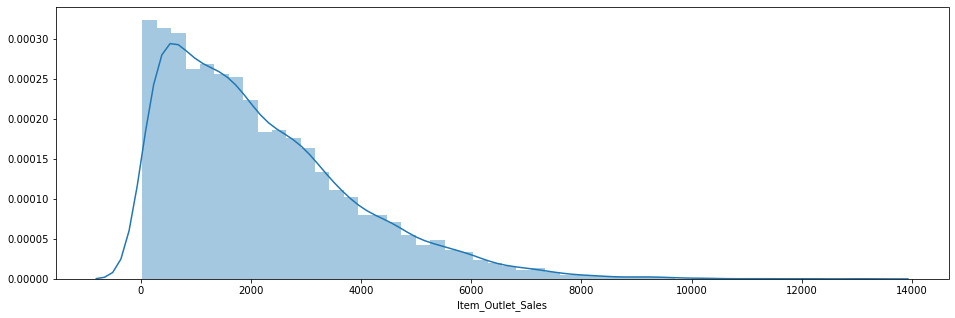

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(big_mart['Item_Outlet_Sales'], ax=ax)


In [9]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [10]:
big_mart.Item_Fat_Content.value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
big_mart.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
big_mart.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
big_mart.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
data_missing=big_mart.isnull().sum()

In [15]:
data_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
twowaytable=pd.crosstab(big_mart['Outlet_Size'],big_mart['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [17]:
pd.crosstab(big_mart['Outlet_Size'],big_mart['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [18]:
big_mart.Outlet_Size.isnull().sum()

2410

In [19]:
def impute_outlet_size(cols):
    Outlet_Size=cols[0]
    Outlet_Location_Type=cols[1]
    Outlet_Type=cols[2]
    
    if pd.isnull(Outlet_Size):
        
        if (Outlet_Type == 'Supermarket Type1' and  Outlet_Type !='Grocery Store' and  Outlet_Type !='Supermarket Type2' and  Outlet_Type !='Supermarket Type3' and  Outlet_Location_Type =='Tier3'):
            return 'High'
        elif (Outlet_Type == 'Supermarket Type1' and  Outlet_Type =='Grocery Store' and  Outlet_Type !='Supermarket Type2' and  Outlet_Type !='Supermarket Type3' and  Outlet_Location_Type !='Tier3'):
            return 'Small'
        else:
            return 'Medium'
    else:
            return Outlet_Size

In [20]:
 big_mart['Outlet_Size']= big_mart[['Outlet_Size','Outlet_Location_Type','Outlet_Type']].apply(impute_outlet_size,axis=1)

In [21]:
big_mart.Outlet_Size.isnull().sum()

0

In [22]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')

In [25]:
Item_weightDF = big_mart.iloc[:,1:2]

In [26]:
imputer = imputer.fit(Item_weightDF) 
Item_weightDF = imputer.transform(Item_weightDF)

In [27]:
Item_weightDF=pd.DataFrame(Item_weightDF)

In [28]:
Item_weightDF.columns=['Item_Weight']

In [29]:
big_mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
big_mart.drop(['Item_Weight'],axis=1,inplace=True)

In [31]:
big_mart=pd.concat([big_mart,Item_weightDF],axis=1)

In [32]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Item_Weight                8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [37]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
big_mart.loc[big_mart['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
big_mart.loc[big_mart['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
big_mart.loc[big_mart['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

In [35]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Item_Weight                8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [41]:
Item_Fat_Content_DF= pd.get_dummies(big_mart['Item_Fat_Content'],drop_first=True)
Item_Type_DF=pd.get_dummies(big_mart['Item_Type'],drop_first=True)
Outlet_Size_DF=pd.get_dummies(big_mart['Outlet_Size'],drop_first=True)
Outlet_Location_Type_DF=pd.get_dummies(big_mart['Outlet_Location_Type'],drop_first=True)
Outlet_Type_DF=pd.get_dummies(big_mart['Outlet_Type'],drop_first=True)

In [47]:
big_mart_encode=pd.concat([big_mart,Item_Fat_Content_DF,Item_Type_DF,Outlet_Size_DF,Outlet_Location_Type_DF,Outlet_Type_DF],axis=1)

In [48]:
big_mart_encode.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)


In [77]:
big_mart_encode.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Regular,Breads,Breakfast,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,9.30,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,5.92,1,0,0,...,0,1,0,1,0,0,1,0,1,0
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,17.50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,0.000000,182.0950,OUT010,1998,732.3800,19.20,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,8.93,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [76]:
X=big_mart_encode.drop('Item_Outlet_Sales',axis=1)
y=big_mart_encode['Item_Outlet_Sales']

In [79]:
X=X.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [86]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [63]:
#Decision trees
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)


regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [72]:
y_pred = regressor1.predict(X_test)

In [73]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
5252,1126.5336,420.58586
2216,8851.1452,4614.19374
4072,739.0380,3049.83006
5787,3866.9664,2219.71062
5657,818.9340,961.94784
...,...,...
3878,3677.2134,2746.42500
2510,490.0288,1080.32708
215,131.1626,152.40162
1952,554.6114,986.91534


In [87]:
regressor1.score(X_test,y_test)

0.5158193758742073

In [69]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_1)))

Mean Absolute Error: 1057.061119038905
Mean Squared Error: 1994936.292711643
Root Mean Squared Error: 1412.422136866894


In [82]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10,random_state = 4)
regressor1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=4)

In [83]:
y_pred = regressor1.predict(X_test)

In [84]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
5252,1126.5336,386.36374
2216,8851.1452,3827.41788
4072,739.0380,3602.11116
5787,3866.9664,2060.71758
5657,818.9340,1062.61680
...,...,...
3878,3677.2134,2998.49688
2510,490.0288,954.15798
215,131.1626,156.06352
1952,554.6114,1266.75108


In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 837.0240788739003
Mean Squared Error: 1424380.7233442927
Root Mean Squared Error: 1193.4742239966026
